In [10]:
import open3d as o3d
import numpy as np
import math

import sys
from heapq import heappush, heappop

#edges class
class Edge:
    def __init__(self,svert,evert,l):
        self.svert=svert
        self.evert=evert
        self.l=l
    def __str__(self):
        return f"({self.svert}, {self.evert}, {self.l})"
    
class Vertex:
    def __init__(self, vid, edgelist): # @Dave: I change the voxel to vid
        self.vid=vid
        self.edgelist=edgelist
        
        
    def __str__(self):
        return (f"{self.vid} to: " + "".join([ f"( {e.evert.vid}, {e.l:.5f} ), " for e in self.edgelist]))[:-2]
    
    # for heap
    def __eq__(self, other):
        return self.vid == other.vid
        
    def __lt__(self, other):
        return self.vid < other.vid
    
def voxels2graph(grid, size):
    #add edges
    voxels=grid.get_voxels()
    # print(voxels)
    vertices=[Vertex(tuple(vx.grid_index),list()) for vx in voxels]
    for v1 in vertices:
        # generate distanc
        c1=voxel_grid.get_voxel_center_coordinate(np.array(v1.vid))
        for v2 in vertices:
            c2=voxel_grid.get_voxel_center_coordinate(np.array(v2.vid))
            if np.linalg.norm(c1-c2)<=math.sqrt(3)*size and np.linalg.norm(c1-c2)!=0:
                edge=Edge(v1,v2,np.linalg.norm(c1-c2)) # length
                v1.edgelist.append(edge)
    return vertices


class Dijkstra:
    def __init__(self, vertices):
        self.vertices = vertices
        self.n = len(vertices)

    def dijkstra(self, start, verbose=False): # start in our case is a list
        dis, vis, hq = {}, {}, []

        for v in self.vertices: # todo 
            dis[v.vid] = 99999999
            vis[v.vid] = False

        dis[start.vid], vis[start.vid] = 0, True 
        heappush(hq, (0, start))

        while hq:
            (d, v) = heappop(hq)
            vis[v.vid] = True

            for e in v.edgelist: 
                ev, weight = e.evert, e.l
                if (not vis[ev.vid]) and (d + weight < dis[ev.vid]):
                    dis[ev.vid] = d + weight 
                    heappush(hq, (dis[ev.vid], ev))
        if verbose:
            print(f"Starting at: {start.vid}...", 
                  ''.join(['' if v==0 else f"\nthe s.d. to {k} = {v:.4f}" for k, v in dis.items()]), 
                  "\n")
        return dis
#load
#data=np.load('cam1_0001_cam2_0004.npz')
#pcd=o3d.geometry.PointCloud()
#pcd.points=o3d.utility.Vector3dVector(data['s_pc'])

# test case 1
testcloud=np.array([[0,0,0],[0,0,1],[0,0,2],[0,1,1],[0,0,3]])
# print(testcloud)
pcd=o3d.geometry.PointCloud()
pcd.points=o3d.utility.Vector3dVector(testcloud)
size=1
voxel_grid=o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,voxel_size=size)



vertices = voxels2graph(voxel_grid, size)

[<__main__.Vertex object at 0x12ab00390>, <__main__.Vertex object at 0x12ab000d0>, <__main__.Vertex object at 0x12ab00710>, <__main__.Vertex object at 0x12ad12890>, <__main__.Vertex object at 0x12ad12fd0>]


In [11]:


print("The following is dijkstra for test case 1")
di = Dijkstra(vertices)
for v in vertices: 
    di.dijkstra(v, True) # set to false if the graph is large

Starting at: (0, 0, 0)... 
the s.d. to (0, 0, 1) = 1.0000
the s.d. to (0, 0, 2) = 2.0000
the s.d. to (0, 1, 1) = 1.4142
the s.d. to (0, 0, 3) = 3.0000 

Starting at: (0, 0, 1)... 
the s.d. to (0, 0, 0) = 1.0000
the s.d. to (0, 0, 2) = 1.0000
the s.d. to (0, 1, 1) = 1.0000
the s.d. to (0, 0, 3) = 2.0000 

Starting at: (0, 0, 2)... 
the s.d. to (0, 0, 0) = 2.0000
the s.d. to (0, 0, 1) = 1.0000
the s.d. to (0, 1, 1) = 1.4142
the s.d. to (0, 0, 3) = 1.0000 

Starting at: (0, 1, 1)... 
the s.d. to (0, 0, 0) = 1.4142
the s.d. to (0, 0, 1) = 1.0000
the s.d. to (0, 0, 2) = 1.4142
the s.d. to (0, 0, 3) = 2.4142 

Starting at: (0, 0, 3)... 
the s.d. to (0, 0, 0) = 3.0000
the s.d. to (0, 0, 1) = 2.0000
the s.d. to (0, 0, 2) = 1.0000
the s.d. to (0, 1, 1) = 2.4142 



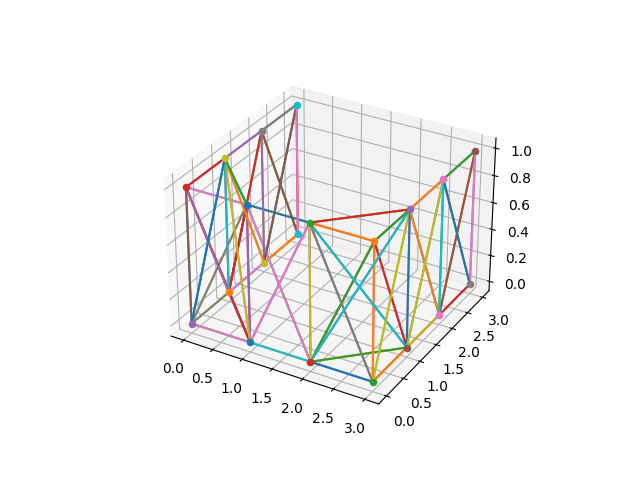

In [13]:
# test case 2
import matplotlib.pyplot as plt
%matplotlib widget

#testcloud=np.array([[0,0,0],[0,0,1],[0,0,2],[0,1,1],[0,0,3]])
testcloud=np.array([[0,0,0],[1,0,0],[2,0,0],[3,0,0],[3,1,0],[3,2,0],[3,3,0],[0,1,0],[0,2,0],[0,3,0],[0,0,1],[1,0,1],[2,0,1],[3,0,1],[3,1,1],[3,2,1],[3,3,1],[0,1,1],[0,2,1],[0,3,1]])
pcd=o3d.geometry.PointCloud()
pcd.points=o3d.utility.Vector3dVector(testcloud)

size=1
voxel_grid=o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,voxel_size=size)

graph = voxels2graph(voxel_grid, size=size)

fig = plt.figure()
ax = plt.axes(projection='3d')
for v in graph:
    c1=voxel_grid.get_voxel_center_coordinate(np.array(v.vid))
    ax.scatter(c1[0],c1[1],c1[2],marker='o')
    for e in v.edgelist:
        v2 = e.evert
        c2=voxel_grid.get_voxel_center_coordinate(np.array(v2.vid))
        ax.plot3D([c1[0],c2[0]],[c1[1],c2[1]],[c1[2],c2[2]])


In [14]:
di = Dijkstra(graph)

In [18]:
print("The following is dijkstra for test case 1")
di.dijkstra(graph[0], verbose=True);

Starting at: (1, 0, 0)... 
the s.d. to (0, 1, 0) = 1.4142
the s.d. to (3, 0, 0) = 2.0000
the s.d. to (2, 0, 0) = 1.0000
the s.d. to (0, 0, 0) = 1.0000
the s.d. to (3, 1, 0) = 2.4142
the s.d. to (3, 2, 0) = 3.4142
the s.d. to (3, 3, 0) = 4.4142
the s.d. to (0, 2, 0) = 2.4142
the s.d. to (0, 3, 0) = 3.4142
the s.d. to (1, 0, 1) = 1.0000
the s.d. to (3, 0, 1) = 2.4142
the s.d. to (2, 0, 1) = 1.4142
the s.d. to (0, 0, 1) = 1.4142
the s.d. to (3, 1, 1) = 2.7321
the s.d. to (3, 3, 1) = 4.7321
the s.d. to (3, 2, 1) = 3.7321
the s.d. to (0, 2, 1) = 2.7321
the s.d. to (0, 1, 1) = 1.7321
the s.d. to (0, 3, 1) = 3.7321 

